# 다변량 분석 1차 과제

- 데이터 셋 : 집 가격 예측 데이터
https://www.kaggle.com/datasets/shree1992/housedata?select=data.csv



The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues

필요한 모듈 준비

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import skewtest as skew
from scipy.stats import kurtosistest as kurtosis
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import train_test_split

- date: Date of the house sale
- price: Price of each house sold
- bedrooms: Number of bedrooms in each house
- bathrooms: Number of bathrooms in each house (0.5 indicates a room with a toilet but no shower)
- sqft_living: Square footage of the interior living space of each house
- sqft_lot: Square footage of the land space of each house
- floors: Number of floors in each house
- waterfront: Whether or not the house is located on a waterfront (1 = yes, 0 = no)
- view: An index from 0 to 4 of how good the view of the property was
- condition: An index from 1 to 5 on the condition of the house,
- sqft_above: The square footage of the interior housing space that is above ground level
- sqft_basement: The square footage of the interior housing space that is below ground level
- yr_built: The year that each house was built
- yr_renovated: The year that each house was renovated (if applicable)
- street: The street name where the house located
- city: The city name where the house located
- country: The country name where the house located

In [19]:
#데이터 불러오기
data = pd.read_csv("data.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [20]:
print(data.columns)
data.info()

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_buil

In [21]:
def data_explanation(data):
    with open('./data_description.txt','w') as f:
        for i in data.columns:
            f.write(f'Feature Name: {i} \n')
            f.write(f'# of data: {len(data[i])} \n')
            f.write(f'# of unique data: {len(data[i].unique())} \n')
            f.write(f'unique datas: {data[i].unique()} \n\n')
    f.close()
data_explanation(data)

- date: 매매시간이 2014년 4,5,6월에 대해 존재하는데, 큰 날짜 차이가 나지 않는 만큼 가격에는 큰 영향이 없을 것으로 보여진다.
- statezip: 미국 주택 고유번호, 우리나라의 우편번호와 비슷한 것으로 보여진다. City category에 어느정도 포함된 내용일 것으로 보이며, 총 데이터 양 77개로 one-hot-encoding 시 너무 Sparce한 matrix가 형성될 것으로 보임.
- country: USA 하나의 고유데이터밖에 존재하지 않음
- street: 실제로는 '테헤란로'처럼 중요한 지표이나, 총 4600여개의 데이터 중 unique 데이터가 4500, 범주형 변수기 때문에 MLR 에서는 분별능력이 없을 것으로 보인다.

In [22]:
data = data.drop(columns = ['date','statezip','country','street'], axis= 1)

<AxesSubplot:>

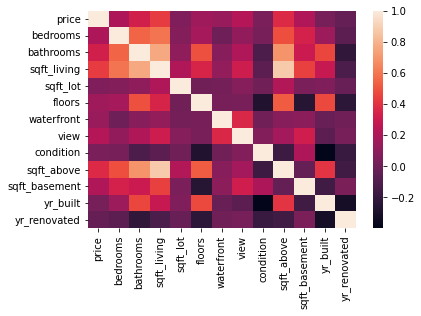

In [25]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [7]:
data[data.isna()].count().sum() #결측치 확인

0

In [8]:
def one_hot_changer(data, column_name):
    """
    one_hot_encoding된 데이터 프레임을 반환합니다.
    """
    oh = OneHotEncoder()
    encoder = oh.fit_transform(data[column_name].values.reshape(-1,1)).toarray()
    df_OH = pd.DataFrame(encoder, columns = [column_name + str(oh.categories_[0][i]) for i in range (len(oh.categories_[0]))])
    print(df_OH.columns)
    return df_OH

df_OH = one_hot_changer(data, 'city')

Index(['cityAlgona', 'cityAuburn', 'cityBeaux Arts Village', 'cityBellevue',
       'cityBlack Diamond', 'cityBothell', 'cityBurien', 'cityCarnation',
       'cityClyde Hill', 'cityCovington', 'cityDes Moines', 'cityDuvall',
       'cityEnumclaw', 'cityFall City', 'cityFederal Way',
       'cityInglewood-Finn Hill', 'cityIssaquah', 'cityKenmore', 'cityKent',
       'cityKirkland', 'cityLake Forest Park', 'cityMaple Valley',
       'cityMedina', 'cityMercer Island', 'cityMilton', 'cityNewcastle',
       'cityNormandy Park', 'cityNorth Bend', 'cityPacific', 'cityPreston',
       'cityRavensdale', 'cityRedmond', 'cityRenton', 'citySammamish',
       'citySeaTac', 'citySeattle', 'cityShoreline', 'citySkykomish',
       'citySnoqualmie', 'citySnoqualmie Pass', 'cityTukwila', 'cityVashon',
       'cityWoodinville', 'cityYarrow Point'],
      dtype='object')


In [9]:
len(df_OH.columns)

44

In [10]:
data = data.drop(columns=['city'])
data = pd.concat([data, df_OH.iloc[:,:-1]], axis = 1) #다중공선성 제어를 위해 column 하나 Drop

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    4600 non-null   float64
 1   bedrooms                 4600 non-null   float64
 2   bathrooms                4600 non-null   float64
 3   sqft_living              4600 non-null   int64  
 4   sqft_lot                 4600 non-null   int64  
 5   floors                   4600 non-null   float64
 6   waterfront               4600 non-null   int64  
 7   view                     4600 non-null   int64  
 8   condition                4600 non-null   int64  
 9   sqft_above               4600 non-null   int64  
 10  sqft_basement            4600 non-null   int64  
 11  yr_built                 4600 non-null   int64  
 12  yr_renovated             4600 non-null   int64  
 13  cityAlgona               4600 non-null   float64
 14  cityAuburn              

In [26]:
def statistics(data, except_columns_start:int):
    """
    input: Pandas DataFrame, 제외할 Column 시작 index number
    output: statistics DataFrame
    """
    df_stat = pd.DataFrame(columns = ['mean','std','skewness','skew_pvalue','kurtosis','kurtosis_pvalue'])
    data = data.iloc[:,:except_columns_start]
    for i in data.columns:
        feature = data[i]
        feature_name = i
        
        mean = np.mean(feature)
        std = np.std(feature)
        skewness = skew(feature)
        kurtosis_ = kurtosis(feature)
        
        stats = {'mean': round(mean,5),'std':round(std,5),'skewness':round(skewness[0],5),'skew_pvalue':round(skewness[1],5),'kurtosis':round(kurtosis_[0],5),'kurtosis_pvalue':round(kurtosis_[1],5)}
        con = pd.DataFrame(stats,index=[feature_name])
        df_stat = pd.concat([df_stat,con],axis=0)
    display(df_stat)
    return df_stat

In [27]:
df_stat = statistics(data, 13)

,mean,std,skewness,skew_pvalue,kurtosis,kurtosis_pvalue
price,551962.98847,563773.41284,93.15700,0.0,49.79291,0.00000
bedrooms,3.40087,0.90875,12.07697,0.0,10.95599,0.00000
bathrooms,2.16082,0.78370,15.77784,0.0,14.11622,0.00000
sqft_living,2139.34696,963.10221,33.81466,0.0,26.92820,0.00000
sqft_lot,14852.51609,35880.53545,75.36015,0.0,45.67968,0.00000
floors,1.51207,0.53823,14.31969,0.0,-10.39700,0.00000
waterfront,0.00717,0.08439,76.10038,0.0,43.88472,0.00000
view,0.24065,0.77832,47.99289,0.0,28.82441,0.00000
condition,3.45174,0.67716,22.64338,0.0,2.53783,0.01115
sqft_above,1827.26543,862.07526,30.92859,0.0,20.79630,0.00000


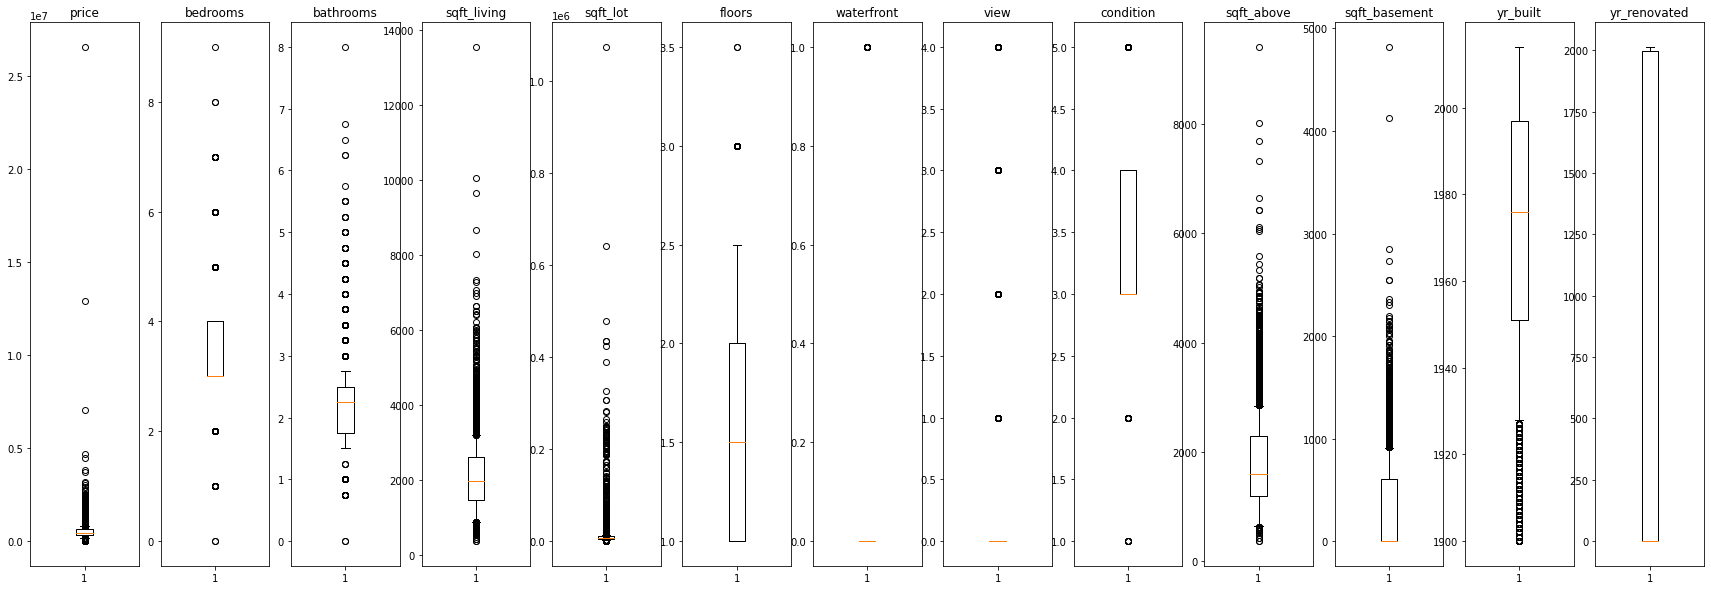

In [28]:
def box_plot_display(data, except_columns_start:int):
    data = data.iloc[:,:except_columns_start]
    fig, axs = plt.subplots(1,len(data.columns),figsize=(30,10))

    # Create a boxplot for each dataframe
    for i in range(len(data.columns)):
        axs[i].boxplot(data.iloc[:,i].to_numpy(),whis=0.5)
        axs[i].set_title(data.columns[i])

    plt.show()
    
box_plot_display(data,13)
    

year_renovated 부분을 보면 year built 가 minimum이 1900인데, renovated의 minimum이 0으로 되어있는 것을 확인.

실제로는 재건축을 하지 않은 것이나, 이를 그대로 쓰면 명목형데이터(재건축안함)을 수치형 데이터와 같이 쓰는 꼴이 되므로,

year_renovated에 0으로 되어있는 부분을 건축일로 변경하는 것이 옳을 듯 하다.

In [15]:
def reno_to_built(data):
    reno = data['yr_renovated']
    built = data['yr_built']
    
    for i in range(len(reno)):
        if reno[i] == 0:
            reno[i] = built[i]
    return reno

reno = reno_to_built(data)

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_8844/3555407416.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reno[i] = built[i]


In [16]:
reno.unique()

array([2005, 1921, 1966, 1963, 1992, 1994, 1976, 1989, 1985, 2010, 1988,
       1980, 2009, 1969, 1965, 1956, 1997, 2000, 1923, 1979, 1991, 1987,
       1948, 1920, 2014, 1999, 1967, 2003, 1995, 1944, 1957, 1974, 1983,
       1949, 1977, 1996, 2001, 1929, 2006, 2008, 1912, 2007, 1986, 1973,
       1954, 2011, 2013, 1942, 1908, 1972, 1990, 1998, 1971, 1975, 2004,
       1958, 1960, 1902, 1962, 1945, 1930, 1970, 1984, 1982, 1938, 1978,
       1928, 1950, 1964, 2002, 1903, 1959, 1993, 1910, 1904, 1947, 1917,
       1968, 1905, 2012, 1925, 1952, 1918, 1940, 1941, 1926, 1953, 1943,
       1936, 1981, 1927, 1931, 1951, 1937, 1946, 1932, 1901, 1906, 1907,
       1915, 1939, 1922, 1916, 1934, 1955, 1924, 1933, 1935, 1961, 1900,
       1913], dtype=int64)

In [17]:
data['yr_renovated'] = reno

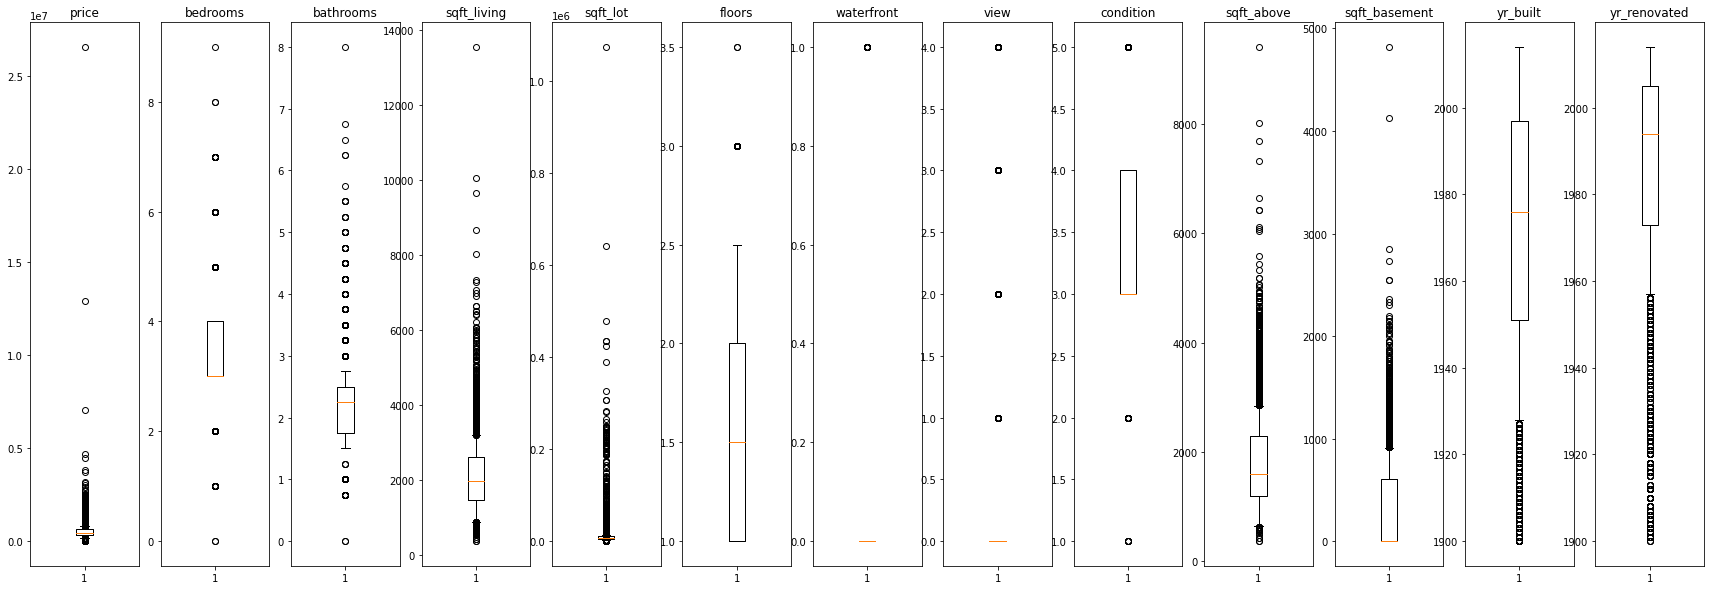

In [18]:
box_plot_display(data,13)